[[ 4  0  0  0 19]
 [ 0  0  0  0  8]
 [ 0  0  0  0 11]
 [ 0  0  0  2 21]
 [ 0  0  0  0 81]]


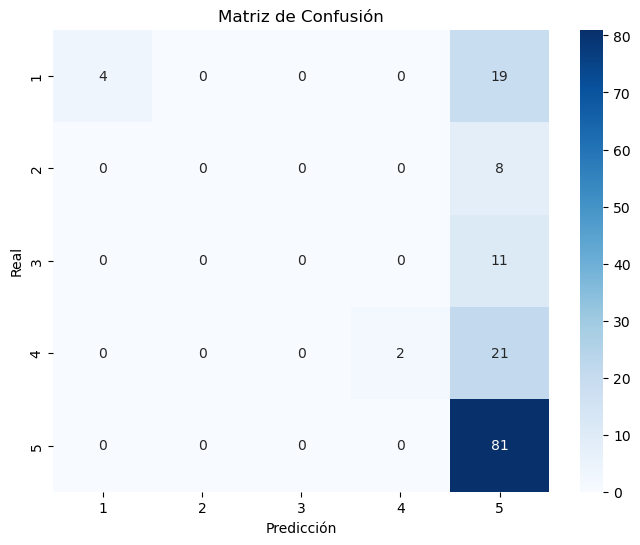

Accuracy: 0.60


In [90]:
"""
import re
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


spacy.cli.download("en_core_web_sm")  # Descargar el modelo de spaCy
"""
nlp = spacy.load("en_core_web_sm")  # Cargar modelo de spaCy en inglés

# Cargar stopwords en inglés de NLTK
stop_words = set(stopwords.words('spanish'))

# Ejemplo de review con su puntuación
"""reviews = [
    ("The product is amazing! I love it so much. Highly recommended!", 5),
    ("It's okay, NOT the best but not the worst either.", 3),
    ("Terrible experience. The quality is very bad.", 1)
]
"""
df = pd.read_csv("data/reviews.csv")  
#prueba = [df.review[1:], df.stars[1:]]
reviews = np.column_stack((df.review, df.stars)) 


def preprocess_text(text):
    # 1. Convertir a minúsculas
    #text = text.lower()
    # 2. Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    palabras = text.split()
    for palabra in palabras:
        if not palabra.isupper() or len(palabra) < 2: 
            palabra.lower()

    text = " ".join(palabras)  
    # 3. Tokenización y lematización con spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and not token.is_punct]
    
    # 4. Unir tokens procesados
    return ' '.join(tokens)

# Aplicar preprocesamiento a cada review
processed_reviews = [(preprocess_text(text), score) for text, score in reviews]
# Convertir a DataFrame para su uso en ML
df = pd.DataFrame(processed_reviews, columns=['review', 'score'])

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['score']


# Verificar si hay suficientes datos para dividir
if len(df) > 1:
    # División de datos para entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

    # Entrenar un modelo simple (Random forest)
    pesos = 1/(y_train.value_counts(sort = False) / len(y_train)).sort_index()
    pesos_dict = pesos.to_dict()
    model = RandomForestClassifier(random_state=0, class_weight = pesos_dict)
    model.fit(X_train, y_train)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    # Evaluación
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
else:
    print("No hay suficientes datos para entrenar el modelo.")


In [73]:
import re
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


spacy.cli.download("en_core_web_sm")  # Descargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")  # Cargar modelo de spaCy en inglés


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [86]:

# Verificar distribución de clases en cada conjunto
print(y_test.value_counts() / len(y_test))
print((y_train.value_counts(sort=False) / len(y_train)).sort_index())
print(y.value_counts() * 5)
print(40 * 5)
print(1/(y_train.value_counts(sort = False) / len(y_train)).sort_index())


score
5    0.554795
4    0.157534
1    0.157534
3    0.075342
2    0.054795
Name: count, dtype: float64
score
1    0.156357
2    0.053265
3    0.075601
4    0.159794
5    0.554983
Name: count, dtype: float64
score
5    2020
4     580
1     570
3     275
2     195
Name: count, dtype: int64
200
score
1     6.395604
2    18.774194
3    13.227273
4     6.258065
5     1.801858
Name: count, dtype: float64


In [42]:
import numpy as np
df = pd.read_csv("data/reviews.csv")  
#prueba = [df.review[1:], df.stars[1:]]
prueba = np.column_stack((df.review, df.stars)) 
print(prueba.shape)
print(prueba[1])

(728, 2)
['Es increíble que manden un producto sin haber probado que cargue. Estay de acuerdo que es de segunda mano, pero debería de cargar sin ningún fallo. La compra la financie con varias cosas y la consola era un regalo. Ahora ni carga, he tenido que hacer devolución que al ser Sábado hasta el Lunes o martes no me lo recogen. Tengo que esperar que le lleguen y a los diez días el rembolso. Así que me quede sin poder dar el regalo y encima no puedo pedir otra, xq al ser financiada, tengo cumplido el dinero de la financiación, hasta que no lo devuelvan a saber cuando. He querido hacer un buen regalo y me ha salido fatal. NO ENTIENDO COMO NO PRUEBAN ANTES TODO BIEN Y LO MANDAN ASI...NI UNA ESTRELLA SE MERECE...'
 1]


In [91]:
print(pesos_dict)

{1: 6.395604395604396, 2: 18.774193548387096, 3: 13.227272727272728, 4: 6.258064516129033, 5: 1.8018575851393188}
